<a href="https://colab.research.google.com/github/Shatakshi127/102117165-SESS_LE1/blob/main/102117165-ShatakshiSaxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]

train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

In [ ]:
def get_duration(waveform, sample_rate):
    return waveform.size(1) / sample_rate


In [ ]:
# Lists to store the statistics
labels = []
durations = []
sampling_rates = []
waveforms = []


In [ ]:
print("Analyzing the training set...")

for i in range(len(train_set)):
    waveform, sample_rate, label, speaker_id, utterance_number = train_set[i]
    duration = get_duration(waveform, sample_rate)

    labels.append(label)
    durations.append(duration)
    sampling_rates.append(sample_rate)
    waveforms.append(waveform)

    # Limit to first 500 samples for performance (optional)
    if i >= 500:
        break


Analyzing the training set...


In [ ]:
import pandas as pd

In [ ]:

# Convert to DataFrame for statistical analysis
df = pd.DataFrame({
    "Label": labels,
    "Duration (seconds)": durations,
    "Sampling Rate (Hz)": sampling_rates
})


In [ ]:
summary = df.describe()


In [ ]:
summary

,Duration (seconds),Sampling Rate (Hz)
count,501.000000,501.0
mean,0.983728,16000.0
std,0.073184,0.0
min,0.448000,16000.0
25%,1.000000,16000.0
50%,1.000000,16000.0
75%,1.000000,16000.0
max,1.000000,16000.0


In [ ]:
label_counts = df['Label'].value_counts()


In [ ]:
print("Statistical Summary of the Dataset:")
print(summary)


Statistical Summary of the Dataset:
       Duration (seconds)  Sampling Rate (Hz)
count          501.000000               501.0
mean             0.983728             16000.0
std              0.073184                 0.0
min              0.448000             16000.0
25%              1.000000             16000.0
50%              1.000000             16000.0
75%              1.000000             16000.0
max              1.000000             16000.0


In [ ]:
# Display the frequency of labels
print("\nFrequency of Labels (Word Occurrences):")
print(label_counts)



Frequency of Labels (Word Occurrences):
Label
backward    501
Name: count, dtype: int64


In [ ]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!mkdir data
!tar -xvzf speech_commands_v0.02.tar.gz -C ./data

import os
import wave
import numpy as np
import pandas as pd
import hashlib
import re

dataset_path = "./data"

file_stats = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            word_label = os.path.basename(root)
            speaker_id = file.split('_')[0]
            with wave.open(file_path, 'r') as wav_file:
                sample_rate = wav_file.getframerate()
                num_frames = wav_file.getnframes()
                duration = num_frames / float(sample_rate)
                n_channels = wav_file.getnchannels()

            file_stats.append({
                'file_path': file_path,
                'word_label': word_label,
                'speaker_id': speaker_id,
                'duration': duration,
                'sample_rate': sample_rate,
                'num_channels': n_channels,
                'num_frames': num_frames,
            })

df = pd.DataFrame(file_stats)
print("original data")
print(df.head())

Streaming output truncated to the last 5000 lines.
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./on/6565a81d_nohash_1.wav
./on/a5d1becc_nohash_3.wav
./on/aff582a1_nohash_4.wav
./on/23da904f_nohash_3.wav
./on/95299b6c_nohash_0.wav
./on/6727b579_nohash_3.wav
./on/4cee0c60_nohash_1.wav
./on/c22d3f18_nohash_4.wav
./on/1496195a_nohash_1.wav
./on/15b0c947_nohash_0.wav
./on/c0e3ff37_nohash_1.wav
./on/332d33b1_nohash_1.wav
./on/9e92ef0c_nohash_2.wav
./on/c5e3817f_nohash_0.wav
./o

In [ ]:
def describe_data(df):
    unique_words = df['word_label'].nunique()
    word_counts = df['word_label'].value_counts()
    unique_speakers = df['speaker_id'].nunique()
    duration_stats = df['duration'].describe()
    sample_rate_stats = df['sample_rate'].describe()
    channel_distribution = df['num_channels'].value_counts()


    print(f"Number of unique words: {unique_words}")
    print(f"Number of unique speakers: {unique_speakers}")
    print("\nWord Counts:\n", word_counts)
    print("\nAudio Duration Statistics:\n", duration_stats)
    print("\nSample Rate Statistics:\n", sample_rate_stats)
    print("\nChannel Distribution:\n", channel_distribution)


describe_data(df)

Number of unique words: 36
Number of unique speakers: 2624

Word Counts:
 word_label
zero                  4052
five                  4052
yes                   4044
seven                 3998
no                    3941
nine                  3934
down                  3917
one                   3890
go                    3880
two                   3880
stop                  3872
six                   3860
on                    3845
left                  3801
eight                 3787
right                 3778
off                   3745
four                  3728
three                 3727
up                    3723
dog                   2128
wow                   2123
house                 2113
marvin                2100
bird                  2064
happy                 2054
cat                   2031
sheila                2022
bed                   2014
tree                  1759
backward              1664
visual                1592
follow                1579
learn                 15

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


word_distribution = df['word_label'].value_counts()


avg_duration_per_word = df.groupby('word_label')['duration'].mean()


speaker_distribution = df['speaker_id'].value_counts()


sns.set(style="whitegrid")

<ipython-input-58-3b7d13af3285>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_distribution.index, y=word_distribution.values, palette="magma")


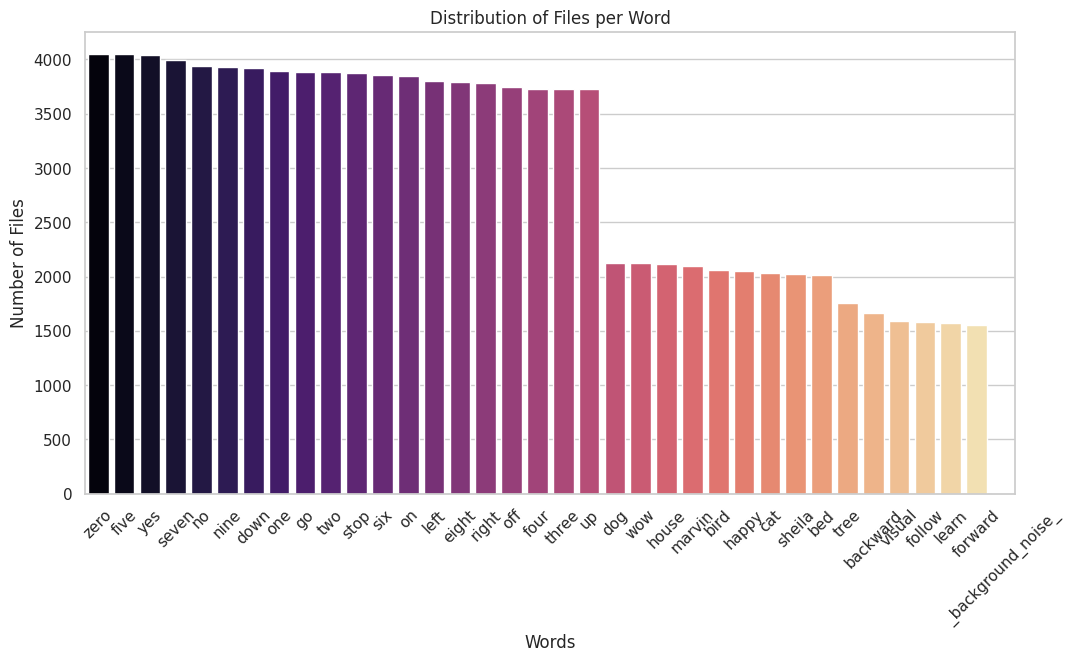

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming word_distribution is a pandas Series or similar structure
plt.figure(figsize=(12, 6))
sns.barplot(x=word_distribution.index, y=word_distribution.values, palette="magma")
plt.title('Distribution of Files per Word')
plt.ylabel('Number of Files')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()


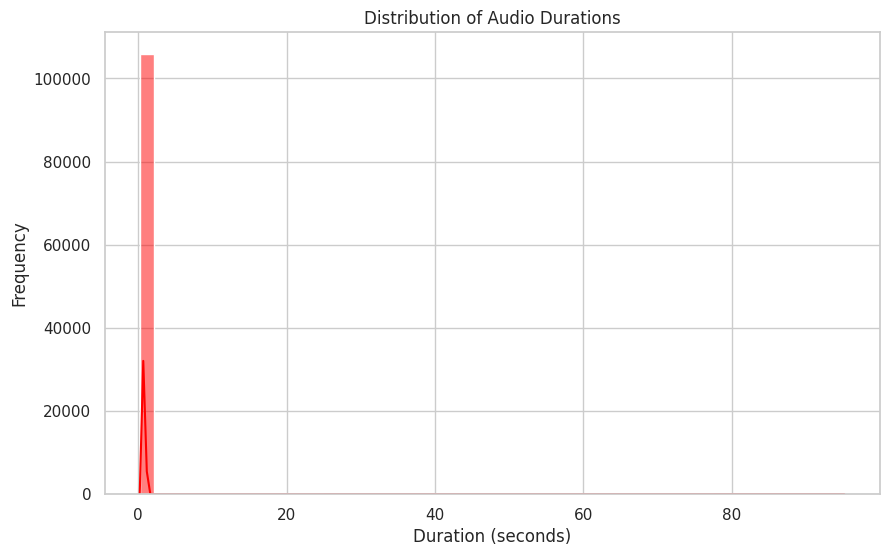

In [ ]:

#Visualizing the Distribution of Audio Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True, color="Red")
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-62-cbeb52c92486>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.index, y=top_speakers.values, palette="magma")


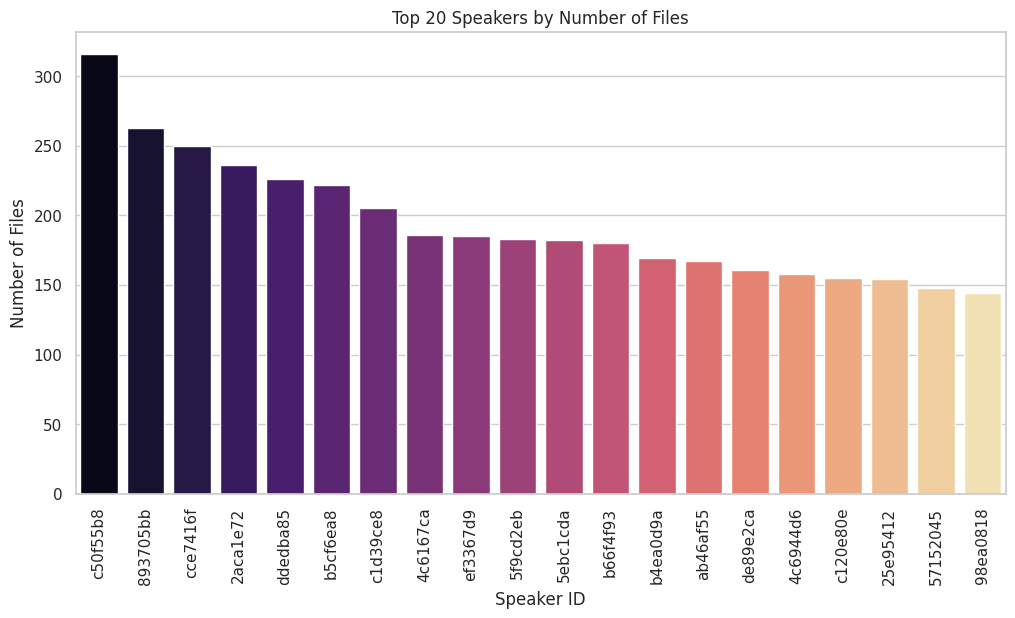

In [ ]:
#Visualizing the Distribution of Files per Speaker
plt.figure(figsize=(12, 6))
top_speakers = speaker_distribution.head(20)  # Displaying top 20 speakers for readability
sns.barplot(x=top_speakers.index, y=top_speakers.values, palette="magma")
plt.title('Top 20 Speakers by Number of Files')
plt.ylabel('Number of Files')
plt.xlabel('Speaker ID')
plt.xticks(rotation=90)
plt.show()

<ipython-input-63-09218dfe5d24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_per_word.index, y=avg_duration_per_word.values, palette="magma")


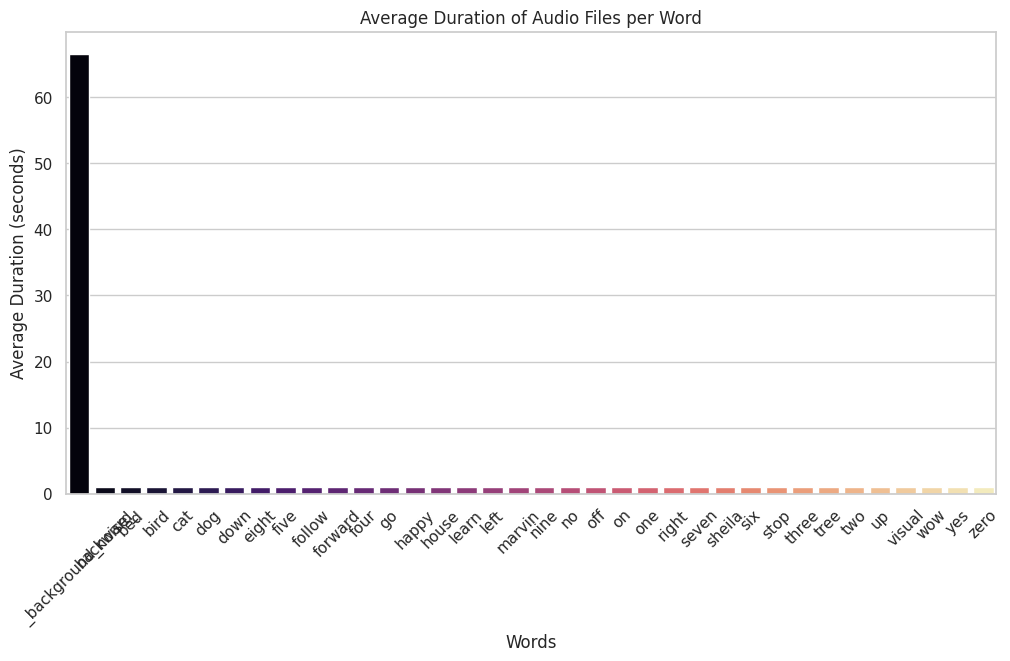

In [ ]:
#Average Duration of Audio Files per Word
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_per_word.index, y=avg_duration_per_word.values, palette="magma")
plt.title('Average Duration of Audio Files per Word')
plt.ylabel('Average Duration (seconds)')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize the waveform of the first audio sample
waveform, sample_rate = waveforms[0], sampling_rates[0]
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


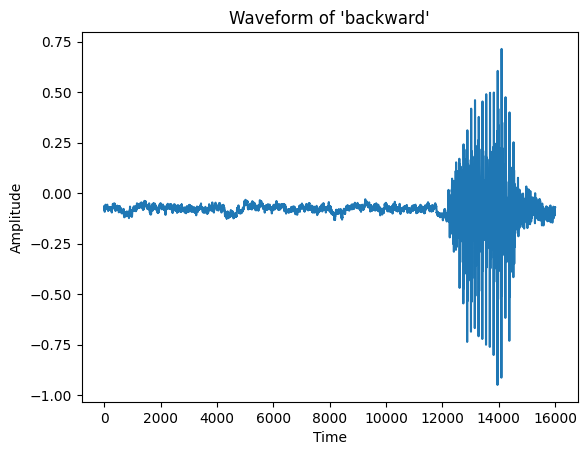

In [ ]:

plt.figure()
plt.title(f"Waveform of '{labels[0]}'")
plt.plot(waveform.t().numpy())
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
# Visualize the MFCC (Mel-frequency cepstral coefficients) spectrogram of the first sample
wave = waveforms[0]
specgram = torchaudio.transforms.MFCC()(wave)

print("Shape of spectrogram: {}".format(specgram.size()))


Shape of spectrogram: torch.Size([1, 40, 81])


/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


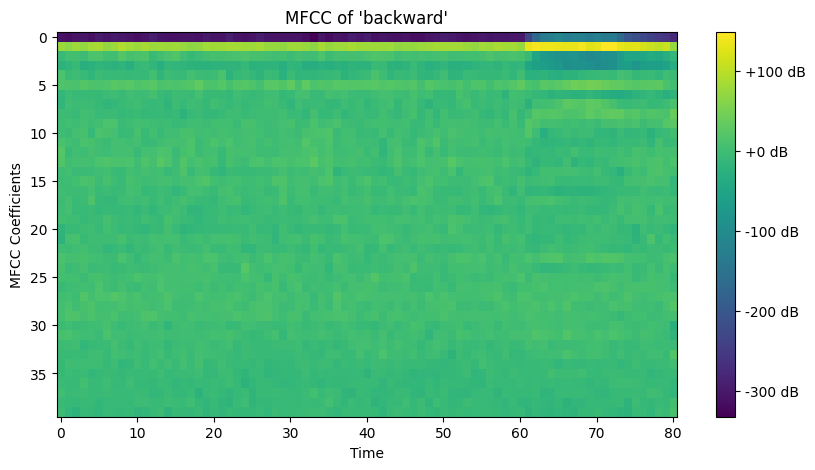

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(specgram[0, :, :].numpy(), cmap="viridis", aspect="auto")
plt.colorbar(format='%+2.0f dB')
plt.title(f"MFCC of '{labels[0]}'")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()


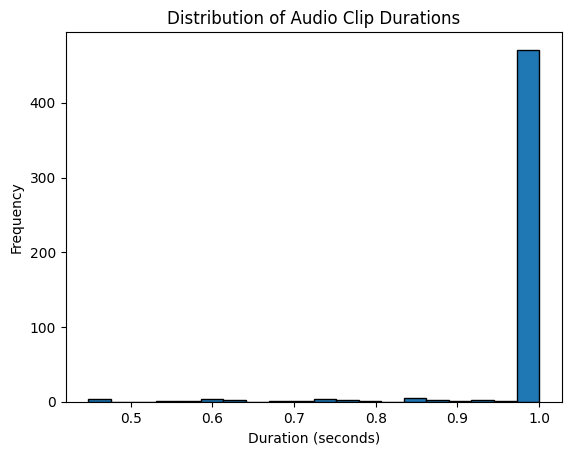

In [ ]:
plt.hist(df['Duration (seconds)'], bins=20, edgecolor='black')
plt.title('Distribution of Audio Clip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
avg_duration_per_label = df.groupby("Label")["Duration (seconds)"].mean()
print("\nAverage Duration of Audio Clips per Word:")
print(avg_duration_per_label)



Average Duration of Audio Clips per Word:
Label
backward    0.983728
Name: Duration (seconds), dtype: float64


In [ ]:
unique_sampling_rates = df['Sampling Rate (Hz)'].unique()
print(f"\nUnique Sampling Rates in the Dataset: {unique_sampling_rates}")



Unique Sampling Rates in the Dataset: [16000]


In [ ]:
# Min and Max duration
min_duration = df['Duration (seconds)'].min()
max_duration = df['Duration (seconds)'].max()
print(f"\nDuration of Audio Clips - Min: {min_duration} seconds, Max: {max_duration} seconds")


Duration of Audio Clips - Min: 0.448 seconds, Max: 1.0 seconds


Shape of Mel Spectrogram: torch.Size([1, 128, 81])


/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


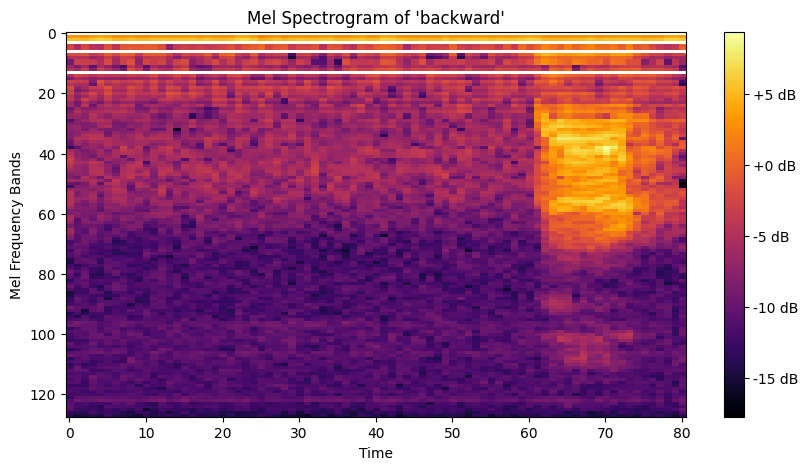

In [ ]:
mel_spectrogram = torchaudio.transforms.MelSpectrogram()(wave)

print("Shape of Mel Spectrogram: {}".format(mel_spectrogram.size()))

plt.figure(figsize=(10, 5))
plt.imshow(mel_spectrogram.log2()[0,:,:].detach().numpy(), cmap="inferno", aspect="auto")
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram of '{labels[0]}'")
plt.xlabel("Time")
plt.ylabel("Mel Frequency Bands")
plt.show()


## Model Building using Sequential Convolutional Neural Network (CNN)

*https://github.com/Shatakshi127/102117165-SESS_LE1/blob/main/102117165_ShatakshiSaxena.ipynb*

In [ ]:
# REDIRECT TO GITHUB LINK: https://github.com/Shatakshi127/102117165-SESS_LE1/blob/main/102117165_ShatakshiSaxena.ipynb

##Model Building using M5 Convolutional Neural Network (CNN)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]



train_set = SubsetSC("training")
test_set = SubsetSC("testing")

In [ ]:
labels = sorted(list(set(datapoint[2] for datapoint in train_set)))
labels

In [ ]:
waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]


In [ ]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform)

In [ ]:
def label_to_index(word):
    return torch.tensor(labels.index(word))


def index_to_label(index):
    return labels[index]

def pad_sequence(batch):
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)

def collate_fn(batch):

    tensors, targets = [], []

    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        targets += [label_to_index(label)]

    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets

In [ ]:
batch_size = 256
num_workers = 1
pin_memory = True

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [ ]:
class M5(nn.Module):
    def __init__(self, n_input=1, n_output=35, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)


model = M5(n_input=transformed.shape[0], n_output=len(labels))
model.to(device)
print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)


M5(
  (conv1): Conv1d(1, 32, kernel_size=(80,), stride=(16,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 32, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=35, bias=True)
)
Numbe

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)


In [ ]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        data = transform(data)
        output = model(data)

        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        pbar.update(pbar_update)
        losses.append(loss.item())


In [ ]:
def number_of_correct(pred, target):

    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):

    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)


        data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)


        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")


In [ ]:
from tqdm.notebook import tqdm


  0%|          | 0/2 [00:00<?, ?it/s]

Train Epoch: 1 [0/84843 (0%)]	Loss: 0.939437
Train Epoch: 1 [5120/84843 (6%)]	Loss: 0.860716
Train Epoch: 1 [10240/84843 (12%)]	Loss: 0.735454
Train Epoch: 1 [15360/84843 (18%)]	Loss: 0.865772
Train Epoch: 1 [20480/84843 (24%)]	Loss: 0.778864
Train Epoch: 1 [25600/84843 (30%)]	Loss: 0.937562
Train Epoch: 1 [30720/84843 (36%)]	Loss: 0.808273
Train Epoch: 1 [35840/84843 (42%)]	Loss: 0.932800
Train Epoch: 1 [40960/84843 (48%)]	Loss: 0.776896
Train Epoch: 1 [46080/84843 (54%)]	Loss: 0.831172
Train Epoch: 1 [51200/84843 (60%)]	Loss: 0.839339
Train Epoch: 1 [56320/84843 (66%)]	Loss: 0.737869
Train Epoch: 1 [61440/84843 (72%)]	Loss: 0.852927
Train Epoch: 1 [66560/84843 (78%)]	Loss: 0.598199
Train Epoch: 1 [71680/84843 (84%)]	Loss: 0.622986
Train Epoch: 1 [76800/84843 (90%)]	Loss: 0.750613
Train Epoch: 1 [81920/84843 (96%)]	Loss: 0.695208

Test Accuracy: 0.7457
Test Precision: 0.7685
Test Recall: 0.7457
Test F1 Score: 0.7482


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Train Epoch: 2 [0/84843 (0%)]	Loss: 0.669352
Train Epoch: 2 [5120/84843 (6%)]	Loss: 0.629712
Train Epoch: 2 [10240/84843 (12%)]	Loss: 0.733228
Train Epoch: 2 [15360/84843 (18%)]	Loss: 0.881628
Train Epoch: 2 [20480/84843 (24%)]	Loss: 0.625145
Train Epoch: 2 [25600/84843 (30%)]	Loss: 0.919374
Train Epoch: 2 [30720/84843 (36%)]	Loss: 0.902484
Train Epoch: 2 [35840/84843 (42%)]	Loss: 0.598149
Train Epoch: 2 [40960/84843 (48%)]	Loss: 0.686876
Train Epoch: 2 [46080/84843 (54%)]	Loss: 0.676698
Train Epoch: 2 [51200/84843 (60%)]	Loss: 0.766529
Train Epoch: 2 [56320/84843 (66%)]	Loss: 0.612093
Train Epoch: 2 [61440/84843 (72%)]	Loss: 0.825784
Train Epoch: 2 [66560/84843 (78%)]	Loss: 0.706810
Train Epoch: 2 [71680/84843 (84%)]	Loss: 0.608915
Train Epoch: 2 [76800/84843 (90%)]	Loss: 0.733720
Train Epoch: 2 [81920/84843 (96%)]	Loss: 0.741557


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



Test Accuracy: 0.6717
Test Precision: 0.7188
Test Recall: 0.6717
Test F1 Score: 0.6661


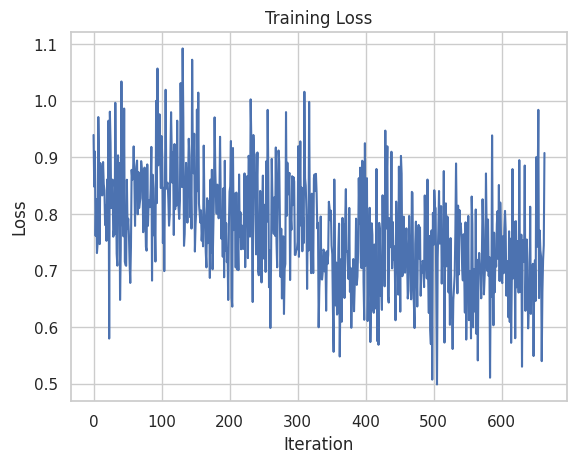

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        data = transform(data)
        output = model(data)

        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        pbar.update(pbar_update)
        losses.append(loss.item())

def test(model):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)

            data = transform(data)
            output = model(data)

            pred = get_likely_index(output)
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

            pbar.update(pbar_update)

    # Convert lists to numpy arrays
    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)

    # Compute metrics
    accuracy = accuracy_score(all_targets, all_preds)
    precision = precision_score(all_targets, all_preds, average='weighted')
    recall = recall_score(all_targets, all_preds, average='weighted')
    f1 = f1_score(all_targets, all_preds, average='weighted')

    print(f"\nTest Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

from tqdm.notebook import tqdm
import numpy as np

log_interval = 20
n_epoch = 2

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model)
        scheduler.step()

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
torch.save(model.state_dict(), './drive/MyDrive/modelM5.pth')


In [ ]:
torch.save(model, './drive/MyDrive/modelM5.pth')


## Fine Tuning on Custom Data

Custom Data is Available at: https://drive.google.com/file/d/1OJBVVYhfUzckO9hCBaQvCRVXa24NN31b/view?usp=sharing

In [ ]:
# Custom Data is Available at: https://drive.google.com/file/d/1OJBVVYhfUzckO9hCBaQvCRVXa24NN31b/view?usp=sharing

## Model Fine Tuning (SCNN)

*https://github.com/Shatakshi127/102117165-SESS_LE1/blob/main/102117165_ShatakshiSaxena.ipynb*

## Model Fine Tuning (M5-CNN)

In [ ]:
model_path = "/drive/MyDrive/modelM5.pth"
model = torch.load(model_path)
model.eval()

In [ ]:
tar_file_path = 'custom_data.tar'
extracted_dir = 'custom_data'

In [ ]:
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)
    with tarfile.open(tar_file_path, 'r:*') as tar:
        tar.extractall(extracted_dir)
        print(f"Extracted to {extracted_dir}")

In [ ]:
custom_data_dir = pathlib.Path(extracted_dir)


In [ ]:
class CustomAudioDataset(torch.utils.data.Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.files = list(directory.glob('**/*.wav'))  # Assuming .wav files

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        waveform, sample_rate = torchaudio.load(file_path)
        if self.transform:
            waveform = self.transform(waveform)
        return waveform, sample_rate


In [ ]:
total_size = len(full_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

In [ ]:
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders are ready.")


In [ ]:
import torch
import torch.quantization

# Define the path to your saved model
model_path = './drive/MyDrive/entireModel.pth'

# Load the saved model
model = torch.load(model_path)
model.eval()  # Set the model to evaluation mode

# Apply dynamic quantization
# Note: You may need to adjust the type of layers you are quantizing.
quantized_model = torch.quantization.quantize_dynamic(
    model,  # Model to quantize
    {torch.nn.Linear},  # Layers to quantize (e.g., Linear layers for a speech model)
    dtype=torch.qint8  # Quantization data type
)

# Define the path to save the quantized model
quantized_model_path = './drive/MyDrive/quantized_modelM5.pth'

# Save the quantized model
torch.save(quantized_model, quantized_model_path)

print(f"Quantized model saved to {quantized_model_path}")

# To verify that the quantized model is loaded correctly, you can load it back
loaded_quantized_model = torch.load(quantized_model_path)
loaded_quantized_model.eval()  # Set the loaded model to evaluation mode

print("Quantized model successfully loaded and ready for inference.")


<ipython-input-9-9b1ea28ac023>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


Quantized model saved to ./drive/MyDrive/quantized_modelM5.pth
Quantized model successfully loaded and ready for inference.


<ipython-input-9-9b1ea28ac023>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_quantized_model = torch.load(quantized_model_path)
/usr/local/lib/python3.10/dist-pac

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.quantization
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from pathlib import Path
import os

# Define your custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = Path(data_dir)
        self.transform = transform
        self.image_paths = list(self.data_dir.glob('**/*.jpg'))  # Adjust file extension as needed
        self.labels = [self._get_label(path) for path in self.image_paths]  # Implement label extraction

    def _get_label(self, path):
        # Extract label from the file path or filename
        # Implement according to your dataset structure
        return 0  # Placeholder

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = self._load_image(image_path)  # Implement image loading
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def _load_image(self, path):
        # Implement image loading and transformation here
        return torch.randn(1, 28, 28)  # Placeholder

# Directory with your dataset
custom_data_dir = Path('path/to/your/dataset')  # Replace with your actual dataset path

# Define transformations (if any)
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transformations if needed
])

# Load full dataset
full_dataset = CustomDataset(data_dir=custom_data_dir, transform=transform)

# Split dataset into training and validation sets
total_size = len(full_dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load the quantized model
quantized_model_path = './drive/MyDrive/quantized_modelM5.pth'
quantized_model = torch.load(quantized_model_path)
quantized_model.eval()

# Inspect the model to understand its structure and quantized layers
def inspect_model(model):
    print("Model Structure and Quantization Details:")
    for name, module in model.named_modules():
        print(f"{name}: {module}")
        if isinstance(module, torch.nn.quantized.QuantizedLinear):
            print(f"  Scale: {module.scale}")
            print(f"  Zero Point: {module.zero_point}")
        elif isinstance(module, torch.nn.quantized.QuantizedConv2d):
            print(f"  Scale: {module.scale}")
            print(f"  Zero Point: {module.zero_point}")

inspect_model(quantized_model)

# Convert the quantized model back to full precision for fine-tuning
def revert_to_full_precision(model):
    model.train()  # Set model to training mode
    model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
    model = torch.quantization.prepare_qat(model, inplace=True)
    return model

# Convert back to full precision
full_precision_model = revert_to_full_precision(quantized_model)

# Define a fine-tuning procedure
def fine_tune_model(model, train_loader, val_loader, num_epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower learning rate for fine-tuning

    # Optional: Use mixed-precision training if supported
    scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            if torch.cuda.is_available():
                inputs, targets = inputs.cuda(), targets.cuda()
                model.cuda()

            optimizer.zero_grad()
            with torch.cuda.amp.autocast(enabled=scaler is not None):
                outputs = model(inputs)
                loss = criterion(outputs, targets)

            if scaler:
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss}")

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                if torch.cuda.is_available():
                    inputs, targets = inputs.cuda(), targets.cuda()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss}")

# Fine-tune the model
fine_tune_model(full_precision_model, train_loader, val_loader, num_epochs=5)

# Convert the fine-tuned model back to quantized form
full_precision_model.eval()
quantized_model_finetuned = torch.quantization.convert(full_precision_model, inplace=False)

# Save the fine-tuned quantized model
fine_tuned_quantized_model_path = './drive/MyDrive/fine_tuned_quantized_modelM5.pth'
torch.save(quantized_model_finetuned, fine_tuned_quantized_model_path)

print(f"Fine-tuned quantized model saved to {fine_tuned_quantized_model_path}")
